<a href="https://colab.research.google.com/github/Amrutasutrave/colab_files/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('creditcardfraud.csv')

In [ ]:
data.head(20)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0.0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0.0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0.0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0.0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15582 entries, 0 to 15581
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15582 non-null  int64  
 1   trans_date_trans_time  15582 non-null  object 
 2   cc_num                 15582 non-null  int64  
 3   merchant               15582 non-null  object 
 4   category               15582 non-null  object 
 5   amt                    15582 non-null  float64
 6   first                  15582 non-null  object 
 7   last                   15582 non-null  object 
 8   gender                 15582 non-null  object 
 9   street                 15582 non-null  object 
 10  city                   15582 non-null  object 
 11  state                  15582 non-null  object 
 12  zip                    15582 non-null  int64  
 13  lat                    15582 non-null  float64
 14  long                   15582 non-null  float64
 15  ci

In [ ]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,15582.000000,1.558200e+04,15582.000000,15582.000000,15582.000000,15582.000000,1.558200e+04,1.558200e+04,15582.000000,15581.000000,15581.000000
mean,7790.500000,4.170574e+17,67.953438,48543.409447,38.515453,-90.053311,9.277153e+04,1.372010e+09,38.508582,-90.052234,0.003016
std,4498.280283,1.310273e+18,138.602156,26758.935531,5.094100,13.580491,3.174108e+05,1.289608e+05,5.130652,13.589005,0.054841
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,3895.250000,1.800468e+14,9.390000,26041.000000,34.544400,-96.701000,7.610000e+02,1.371908e+09,34.672618,-96.726579,0.000000
50%,7790.500000,3.519233e+15,45.635000,48038.500000,39.371600,-87.349000,2.526000e+03,1.371992e+09,39.373863,-87.305194,0.000000
75%,11685.750000,4.634956e+15,81.487500,72011.000000,42.014400,-80.158000,2.113400e+04,1.372112e+09,41.974959,-80.201133,0.000000
max,15581.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372270e+09,66.669356,-66.960745,1.000000


In [ ]:
data=data.dropna()
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15576,15576,2020-06-26 18:04:55,36722699017270,"fraud_Romaguera, Wehner and Tromp",kids_pets,131.83,Jessica,Perez,F,8172 Robertson Parkways Suite 072,...,33.2887,-111.0985,2872,Petroleum engineer,1987-10-28,e35bacf305f96d4d919f0eccad2c9bcc,1372269895,33.353143,-110.186477,0.0
15577,15577,2020-06-26 18:05:18,213157767990030,"fraud_Schneider, Hayes and Nikolaus",food_dining,55.89,Tara,Campbell,F,05050 Rogers Well Apt. 439,...,41.6060,-109.2300,27971,Music therapist,1984-08-01,91e1ab648de605bdcc8b16b808ad9c32,1372269918,42.376537,-110.103197,0.0
15578,15578,2020-06-26 18:05:19,4586810168620942,"fraud_Bernhard, Grant and Langworth",shopping_pos,107.97,Michelle,Gregory,F,6983 Carrillo Isle,...,32.5486,-80.3070,2408,"Sales professional, IT",1997-07-05,8df25e774f817fe32800e369641717bc,1372269919,31.943086,-80.964283,0.0
15579,15579,2020-06-26 18:05:32,3514897282719543,"fraud_Romaguera, Wehner and Tromp",kids_pets,70.27,Steven,Faulkner,M,841 Cheryl Centers Suite 115,...,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,72690f61cdc9525fd467b04bc63eea47,1372269932,42.022181,-77.312639,0.0


In [ ]:
data=data.drop_duplicates()
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15576,15576,2020-06-26 18:04:55,36722699017270,"fraud_Romaguera, Wehner and Tromp",kids_pets,131.83,Jessica,Perez,F,8172 Robertson Parkways Suite 072,...,33.2887,-111.0985,2872,Petroleum engineer,1987-10-28,e35bacf305f96d4d919f0eccad2c9bcc,1372269895,33.353143,-110.186477,0.0
15577,15577,2020-06-26 18:05:18,213157767990030,"fraud_Schneider, Hayes and Nikolaus",food_dining,55.89,Tara,Campbell,F,05050 Rogers Well Apt. 439,...,41.6060,-109.2300,27971,Music therapist,1984-08-01,91e1ab648de605bdcc8b16b808ad9c32,1372269918,42.376537,-110.103197,0.0
15578,15578,2020-06-26 18:05:19,4586810168620942,"fraud_Bernhard, Grant and Langworth",shopping_pos,107.97,Michelle,Gregory,F,6983 Carrillo Isle,...,32.5486,-80.3070,2408,"Sales professional, IT",1997-07-05,8df25e774f817fe32800e369641717bc,1372269919,31.943086,-80.964283,0.0
15579,15579,2020-06-26 18:05:32,3514897282719543,"fraud_Romaguera, Wehner and Tromp",kids_pets,70.27,Steven,Faulkner,M,841 Cheryl Centers Suite 115,...,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,72690f61cdc9525fd467b04bc63eea47,1372269932,42.022181,-77.312639,0.0


In [ ]:
#data visualization
#flag0------legitimate
#flag1----fraudanat
plt.figure(figsize=(10,20))
sns.boxplot(y='amt',x='is_fraud',data=data)
plt.title('fraud detction')
plt.xlabel('is fraud')
plt.ylabel('amount')
plt.show()

In [ ]:
plt.figure(figsize=(10,30))
plt.title('trend based on transaction')
sns.countplot(x="state",data=data,hue='is_fraud')
plt.show()

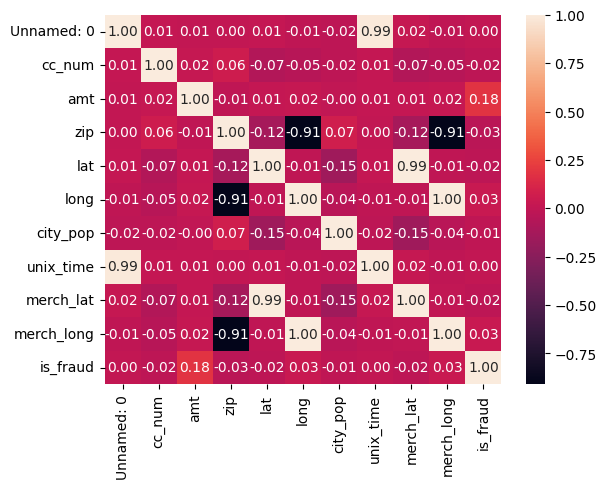

In [ ]:
#visualizing correlation between diff features using heatmap
correlation=data.corr(numeric_only=True)
sns.heatmap(data=correlation,annot=True,fmt='.2f')
plt.show()

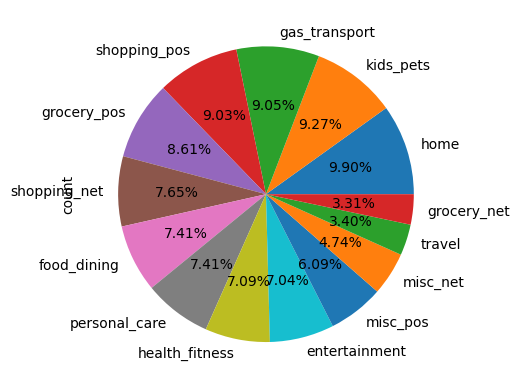

In [ ]:
data['category'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()